In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend as K
tf.compat.v1.experimental.output_all_intermediates(True)

In [2]:
tf.random.set_seed(36)

## Dataset

In [3]:
BASE_DIR_PATH = '../Datasets'
DATASET_FILE = os.path.join(BASE_DIR_PATH, '2016_2017_sto_nino_and_montalban_lag_1.csv')

In [4]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0.1,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,...,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope,Prev_Waterlevel
0,0,0,2016-01-01 00:00:00,1,1,0,0.0,Montalban,0,0,...,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000,NaN
1,1,1,2016-01-01 00:00:00,1,1,0,0.0,Sto_Nino,14420,0,...,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667,NaN
2,2,2,2016-01-01 01:00:00,1,1,1,3600.0,Montalban,0,0,...,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000,21.03
3,3,3,2016-01-01 01:00:00,1,1,1,3600.0,Sto_Nino,14420,0,...,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667,12.18
4,4,4,2016-01-01 02:00:00,1,1,2,7200.0,Montalban,0,1,...,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000,21.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,35035,2017-12-31 21:00:00,12,31,21,63147600.0,Sto_Nino,14420,0,...,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667,12.44
35036,35036,35036,2017-12-31 22:00:00,12,31,22,63151200.0,Montalban,0,0,...,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000,21.18
35037,35037,35037,2017-12-31 22:00:00,12,31,22,63151200.0,Sto_Nino,14420,0,...,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667,12.44
35038,35038,35038,2017-12-31 23:00:00,12,31,23,63154800.0,Montalban,0,0,...,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000,21.18


In [5]:
df = df[['month', 'day', 'hour', 'Station', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'Prev_Waterlevel', 'Waterlevel']]
df

,month,day,hour,Station,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Prev_Waterlevel,Waterlevel
0,1,1,0,Montalban,0,1,2,0,0,NaN,21.03
1,1,1,0,Sto_Nino,0,1,2,0,0,NaN,12.18
2,1,1,1,Montalban,0,1,1,1,0,21.03,21.03
3,1,1,1,Sto_Nino,0,1,1,1,0,12.18,12.19
4,1,1,2,Montalban,1,1,1,0,1,21.03,21.03
...,...,...,...,...,...,...,...,...,...,...,...
35035,12,31,21,Sto_Nino,0,0,0,0,0,12.44,12.44
35036,12,31,22,Montalban,0,0,0,0,0,21.18,21.18
35037,12,31,22,Sto_Nino,0,0,0,0,0,12.44,12.44
35038,12,31,23,Montalban,0,0,0,0,0,21.18,21.18


In [6]:
df = pd.get_dummies(df)
df

,month,day,hour,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Prev_Waterlevel,Waterlevel,Station_Montalban,Station_Sto_Nino
0,1,1,0,0,1,2,0,0,NaN,21.03,1,0
1,1,1,0,0,1,2,0,0,NaN,12.18,0,1
2,1,1,1,0,1,1,1,0,21.03,21.03,1,0
3,1,1,1,0,1,1,1,0,12.18,12.19,0,1
4,1,1,2,1,1,1,0,1,21.03,21.03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,12,31,21,0,0,0,0,0,12.44,12.44,0,1
35036,12,31,22,0,0,0,0,0,21.18,21.18,1,0
35037,12,31,22,0,0,0,0,0,12.44,12.44,0,1
35038,12,31,23,0,0,0,0,0,21.18,21.18,1,0


In [7]:
X_data = df.drop(columns='Waterlevel')
X_data = X_data.values
y_data = df['Waterlevel']
y_data = y_data.values

In [8]:
X_data

array([[ 1.  ,  1.  ,  0.  , ...,   nan,  1.  ,  0.  ],
       [ 1.  ,  1.  ,  0.  , ...,   nan,  0.  ,  1.  ],
       [ 1.  ,  1.  ,  1.  , ..., 21.03,  1.  ,  0.  ],
       ...,
       [12.  , 31.  , 22.  , ..., 12.44,  0.  ,  1.  ],
       [12.  , 31.  , 23.  , ..., 21.18,  1.  ,  0.  ],
       [12.  , 31.  , 23.  , ..., 12.44,  0.  ,  1.  ]])

In [9]:
y_data

array([21.03, 12.18, 21.03, ..., 12.44, 21.18, 12.44])

In [10]:
n = len(df)

In [11]:
X_train, y_train = X_data[:int(0.5*n)], y_data[:int(0.5*n)]
X_val, y_val = X_data[int(0.5*n):int(0.75*n)], y_data[int(0.5*n):int(0.75*n)]
X_test, y_test = X_data[int(0.75*n):], y_data[int(0.75*n):]

In [12]:
X_train.shape

(17520, 11)

In [13]:
X_train = X_train[2:]
y_train = y_train[2:]

X_train.shape

(17518, 11)

In [14]:
X_train

array([[ 1.  ,  1.  ,  1.  , ..., 21.03,  1.  ,  0.  ],
       [ 1.  ,  1.  ,  1.  , ..., 12.18,  0.  ,  1.  ],
       [ 1.  ,  1.  ,  2.  , ..., 21.03,  1.  ,  0.  ],
       ...,
       [12.  , 31.  , 22.  , ..., 12.53,  0.  ,  1.  ],
       [12.  , 31.  , 23.  , ..., 21.31,  1.  ,  0.  ],
       [12.  , 31.  , 23.  , ..., 12.53,  0.  ,  1.  ]])

In [15]:
X_val.shape

(8760, 11)

In [16]:
X_test.shape

(8760, 11)

## Evaluation Metrics

In [17]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [18]:
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Models and Training Loops

In [19]:
def create_train_dnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Create the model
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return model, history

In [20]:
def create_train_cnn_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    # Reshape input for 1D CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    
    conv_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.Conv1D(filters=64, kernel_size=6, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    conv_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    conv_history = conv_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return conv_model, conv_history

In [21]:
def create_train_lstm_model(X_train, y_train, X_val, y_val, max_epochs=20, patience=2):
    if len(X_train.shape) == 2:
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    if len(X_val.shape) == 2:
        X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
            
    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        tf.keras.layers.Flatten(),  # Add Flatten layer to handle dimension mismatch
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min',
        restore_best_weights=True
    )
    
    # Compile the model
    lstm_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanSquaredError(), NSE, r_square]
    )
    
    # Train the model
    lstm_history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=max_epochs,
        callbacks=[early_stopping]
    )
    
    return lstm_model, lstm_history

## Training

In [22]:
dnn_model, dnn_history = create_train_dnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 5s 6ms/step - loss: 5.9097 - mean_squared_error: 5.9097 - NSE: 0.6867 - r_square: 0.9417 - val_loss: 0.0597 - val_mean_squared_error: 0.0597 - val_NSE: 0.9971 - val_r_square: 0.9979
Epoch 2/20
548/548 [==============================] - 4s 7ms/step - loss: 0.1041 - mean_squared_error: 0.1041 - NSE: 0.9944 - r_square: 0.9952 - val_loss: 0.0333 - val_mean_squared_error: 0.0333 - val_NSE: 0.9984 - val_r_square: 0.9987
Epoch 3/20
548/548 [==============================] - 3s 6ms/step - loss: 0.0881 - mean_squared_error: 0.0881 - NSE: 0.9953 - r_square: 0.9961 - val_loss: 0.0305 - val_mean_squared_error: 0.0305 - val_NSE: 0.9985 - val_r_square: 0.9989
Epoch 4/20
548/548 [==============================] - 4s 8ms/step - loss: 0.1012 - mean_squared_error: 0.1012 - NSE: 0.9947 - r_square: 0.9957 - val_loss: 0.0223 - val_mean_squared_error: 0.0223 - val_NSE: 0.9989 - val_r_square: 0.9991
Epoch 5/20
548/548 [==============================] - 5s

In [23]:
cnn_model, cnn_history = create_train_cnn_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 10s 10ms/step - loss: 5.7541 - mean_squared_error: 5.7541 - NSE: 0.6943 - r_square: 0.9276 - val_loss: 0.0425 - val_mean_squared_error: 0.0425 - val_NSE: 0.9980 - val_r_square: 0.9983
Epoch 2/20
548/548 [==============================] - 8s 14ms/step - loss: 0.0974 - mean_squared_error: 0.0974 - NSE: 0.9948 - r_square: 0.9954 - val_loss: 0.0306 - val_mean_squared_error: 0.0306 - val_NSE: 0.9985 - val_r_square: 0.9993
Epoch 3/20
548/548 [==============================] - 7s 12ms/step - loss: 0.0842 - mean_squared_error: 0.0842 - NSE: 0.9955 - r_square: 0.9962 - val_loss: 0.0104 - val_mean_squared_error: 0.0104 - val_NSE: 0.9995 - val_r_square: 0.9996
Epoch 4/20
548/548 [==============================] - 5s 10ms/step - loss: 0.0809 - mean_squared_error: 0.0809 - NSE: 0.9958 - r_square: 0.9965 - val_loss: 0.0134 - val_mean_squared_error: 0.0134 - val_NSE: 0.9993 - val_r_square: 0.9994
Epoch 5/20
548/548 [==============================]

In [24]:
# Train the model
lstm_model, lstm_history = create_train_lstm_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val
)

Epoch 1/20
548/548 [==============================] - 16s 11ms/step - loss: 17.9640 - mean_squared_error: 17.9640 - NSE: 0.0419 - r_square: 0.8368 - val_loss: 0.1267 - val_mean_squared_error: 0.1267 - val_NSE: 0.9936 - val_r_square: 0.9975
Epoch 2/20
548/548 [==============================] - 5s 10ms/step - loss: 0.1517 - mean_squared_error: 0.1517 - NSE: 0.9920 - r_square: 0.9929 - val_loss: 0.1265 - val_mean_squared_error: 0.1265 - val_NSE: 0.9937 - val_r_square: 0.9983
Epoch 3/20
548/548 [==============================] - 6s 11ms/step - loss: 0.1160 - mean_squared_error: 0.1160 - NSE: 0.9939 - r_square: 0.9947 - val_loss: 0.0618 - val_mean_squared_error: 0.0618 - val_NSE: 0.9970 - val_r_square: 0.9985
Epoch 4/20
548/548 [==============================] - 6s 10ms/step - loss: 0.1138 - mean_squared_error: 0.1138 - NSE: 0.9940 - r_square: 0.9949 - val_loss: 0.0584 - val_mean_squared_error: 0.0584 - val_NSE: 0.9971 - val_r_square: 0.9986
Epoch 5/20
548/548 [=============================

## Predictions

In [25]:
X_test

array([[ 7.  ,  2.  , 12.  , ..., 21.27,  1.  ,  0.  ],
       [ 7.  ,  2.  , 12.  , ..., 11.91,  0.  ,  1.  ],
       [ 7.  ,  2.  , 13.  , ..., 21.26,  1.  ,  0.  ],
       ...,
       [12.  , 31.  , 22.  , ..., 12.44,  0.  ,  1.  ],
       [12.  , 31.  , 23.  , ..., 21.18,  1.  ,  0.  ],
       [12.  , 31.  , 23.  , ..., 12.44,  0.  ,  1.  ]])

In [26]:
X_test.shape

(8760, 11)

In [27]:
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_test_lstm

array([[[ 7.  ,  2.  , 12.  , ..., 21.27,  1.  ,  0.  ]],

       [[ 7.  ,  2.  , 12.  , ..., 11.91,  0.  ,  1.  ]],

       [[ 7.  ,  2.  , 13.  , ..., 21.26,  1.  ,  0.  ]],

       ...,

       [[12.  , 31.  , 22.  , ..., 12.44,  0.  ,  1.  ]],

       [[12.  , 31.  , 23.  , ..., 21.18,  1.  ,  0.  ]],

       [[12.  , 31.  , 23.  , ..., 12.44,  0.  ,  1.  ]]])

In [28]:
X_test_lstm.shape

(8760, 1, 11)

In [29]:
predictions = lstm_model(X_test_lstm)
predictions

<tf.Tensor: shape=(8760, 1), dtype=float32, numpy=
array([[21.178875],
       [11.925777],
       [21.18138 ],
       ...,
       [12.373778],
       [21.204393],
       [12.366587]], dtype=float32)>

In [30]:
predictions = np.array(predictions).reshape(-1)
predictions.shape

(8760,)

In [31]:
y_test, y_test.shape

(array([21.26, 11.89, 21.26, ..., 12.44, 21.18, 12.44]), (8760,))

In [32]:
sto_nino_test = y_test[1::2]
sto_nino_test

array([11.89, 11.87, 11.85, ..., 12.44, 12.44, 12.44])

In [33]:
sto_nino_pred = predictions[1::2]
sto_nino_pred

array([11.925777, 11.904332, 11.912008, ..., 12.384869, 12.373778,
       12.366587], dtype=float32)

In [34]:
SS_res = np.sum(np.square(sto_nino_test - sto_nino_pred)) 
SS_tot = np.sum(np.square(sto_nino_test - np.mean(sto_nino_test))) 

sto_nino_nse =  1 - SS_res/SS_tot
sto_nino_nse

0.8934890357368762

In [35]:
sto_nino_mse = np.mean(np.square(sto_nino_test-sto_nino_pred))
sto_nino_mse

0.03306942594081966

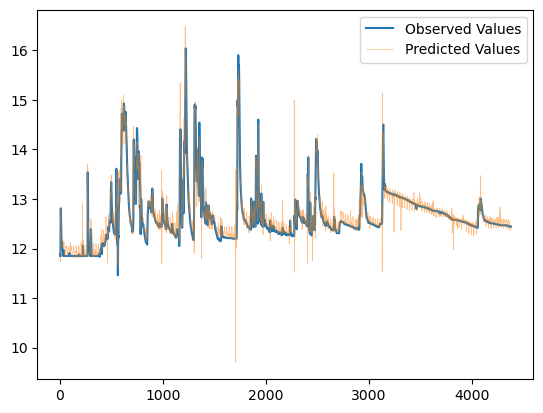

In [36]:
plt.plot(sto_nino_test, label='Observed Values')
plt.plot(sto_nino_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [37]:
montalban_test = y_test[::2]
montalban_test

array([21.26, 21.26, 21.25, ..., 21.18, 21.18, 21.18])

In [38]:
montalban_pred = predictions[::2]
montalban_pred

array([21.178875, 21.18138 , 21.19168 , ..., 21.253447, 21.233398,
       21.204393], dtype=float32)

In [39]:
SS_res = np.sum(np.square(montalban_test - montalban_pred)) 
SS_tot = np.sum(np.square(montalban_test - np.mean(montalban_test))) 

montalban_nse =  1 - SS_res/SS_tot
montalban_nse

0.5329959532687177

In [40]:
montalban_mse = np.mean(np.square(montalban_test-montalban_pred))
montalban_mse

0.14200816199245808

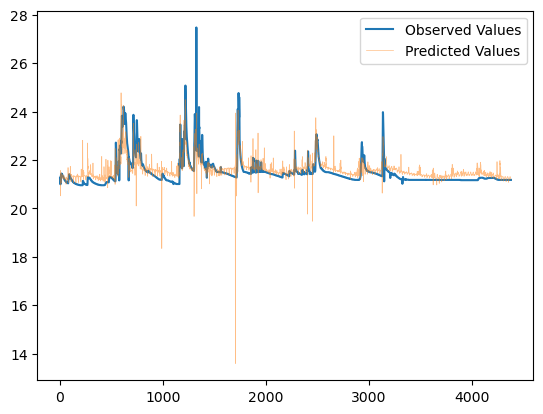

In [41]:
plt.plot(montalban_test, label='Observed Values')
plt.plot(montalban_pred, label='Predicted Values', alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

In [42]:
mse = (sto_nino_mse + montalban_mse)/2
nse = (sto_nino_nse + montalban_nse)/2

mse, nse

(0.08753879396663887, 0.713242494502797)

In [43]:
np.savetxt('results/no_window_lag1_sto_nino.csv', sto_nino_pred, delimiter=',', fmt='%.4f')

In [44]:
np.savetxt('results/no_window_lag1_montalban.csv', montalban_pred, delimiter=',', fmt='%.4f')